# Exercise 1

Compute P(a ≤ x ≤ b) for [a,b] = [2.5,3.5] via sampling using “Scipy”.

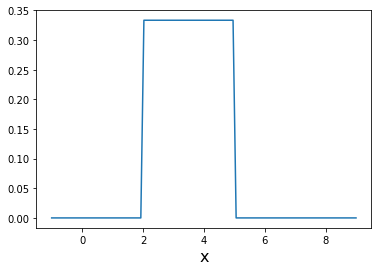

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x_values = np.linspace(-1, 9, 100)
c=2
d=5
dist = stats.uniform(c,d-c)

plt.plot(x_values, dist.pdf(x_values))
plt.xlabel("x", fontsize=16);
#plt.savefig("uniform.pdf")

## Question 1

Compute the mean of the variable x and the variance via sampling using “Scipy”

In [ ]:
samples=dist.rvs(100000)

ind=np.where((samples>2.5)&(samples<3.5))[0]
print("probability=",len(ind)/len(samples))

#this is equal to
ind=np.where((samples>=2.5)&(samples<=3.5))[0]
print("probability=",len(ind)/len(samples))

probability= 0.33208
probability= 0.33208


$p(samples=2.5)$ is zero and so there is no difference between the above two ways of computing that probability.

## Question 2

In [ ]:
print(np.mean(samples),np.var(samples))

3.498685541915375 0.7530115087946003


## Question 3

Compute P(a ≤ x ≤ b|x ≤ 4) for [a,b] = [2.5,3.5] via sampling using “PyMC3” (adapt the code we used for the Gaussian distribution).

In [ ]:
import pymc3 as pm
#import theano.tensor as tt
#import arviz as az

def event_A(x,interval):
    return pm.math.log(pm.math.sigmoid((x-interval[0])*5000.0)*pm.math.sigmoid((-x+interval[1])*5000.0))

mymodel=pm.Model()

with mymodel:
    #prior over x
    x = pm.Uniform('x',lower=2,upper=5)
    #conditioning event is x<=4
    pm.DensityDist('event', event_A, observed = dict(x=x, interval=[-np.inf,4]))
    
with mymodel:
    samples=pm.sample(30000,tune=10000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [x]
100%|██████████| 40000/40000 [00:24<00:00, 1660.66it/s]
There were 12907 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


P(x in [2.5,4.5]|x<=4) 0.49643333333333334


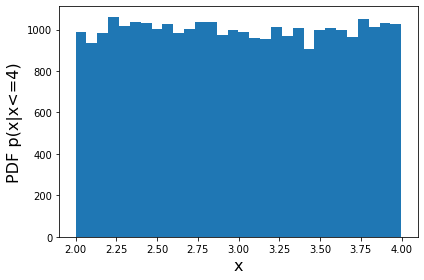

In [ ]:
plt.figure()
plt.hist(samples['x'],bins=30)#this is the posterior PDF
plt.xlabel("x",fontsize=16)
plt.ylabel("PDF p(x|x<=4)",fontsize=16)
print("P(x in [2.5,4.5]|x<=4)",np.sum((samples['x']>=2.5)&(samples['x']<= 3.5))/len(samples))
#plt.savefig("uni_post.pdf")
plt.tight_layout()

## Question 4

Compute the posterior mean and variance of x given the event x ≤ 4 (use the posterior samples you generated for answering the previous question).

In [ ]:
print(np.mean(samples['x']),np.var(samples['x']))

2.999039835100463 0.334745941527606


# Exercise 2

## Question 1

Compute P (0 ≤ y ≤ 0.4) via sampling using “Scipy”

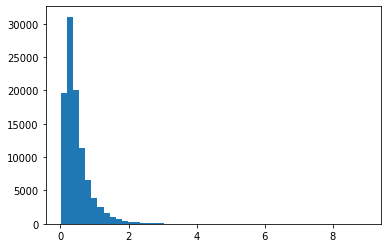

In [ ]:
import numpy as np
import scipy . stats as stats
dist = stats . norm (0 , 1 )

x = dist . rvs ( 100000 )
mu=-1.0
sigma=0.75
y = np . exp ( mu + sigma * x )
plt.hist(y,bins=50);

In [ ]:
ind=np.where((y>0)&(y<0.4))[0]
print("probability=",len(ind)/len(samples))

probability= 1.8211666666666666


## Question 2

Compute the mean of the variable y and the variance via sampling using “Scipy”

In [ ]:
print(np.mean(y),np.var(y))

0.4859226417663062 0.17896211943167223


## Question 3

Plot the distrbution of y using either a histogram or a density plot.

P(y in [0,0.4]|y<=1) 0.6


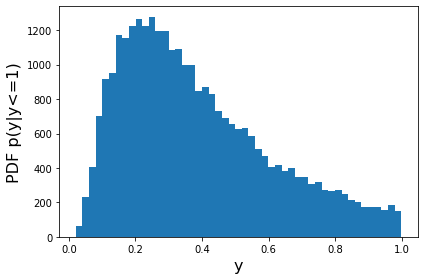

In [ ]:
plt.figure()
plt.hist(samples['y'], bins='auto')#this is the posterior PDF

plt.xlabel("y",fontsize=16)
plt.ylabel("PDF p(y|y<=1)",fontsize=16)

print("P(y in [0,0.4]|y<=1)", np.sum((samples['y']>=0)&(samples['y']<= 0.4))/len(samples))
#plt.savefig("uni_post.pdf")
plt.tight_layout()

#az.plot_dist(samples['y'])

# Question 4

Compute P (0 ≤ y ≤ 0.4|y ≤ 1) via sampling using “PyMC3” (adapt the code we used for the Gaussian distribution).

In [ ]:
import pymc3 as pm
#import theano.tensor as tt
#import arviz as az

def event_A(x,interval):
    return pm.math.log(pm.math.sigmoid((x-interval[0])*5000.0)*pm.math.sigmoid((-x+interval[1])*5000.0))

mymodel=pm.Model()
with mymodel:
    #prior over x
    x = pm.Normal('x',0,1)
    y = pm.Deterministic('y',pm.math.exp(mu+sigma*x))
    #conditioning event is x<=4
    pm.DensityDist('event',event_A,observed=dict(x=y, interval=[0,1]))
    
with mymodel:
    samples=pm.sample(30000,tune=10000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [x]
100%|██████████| 40000/40000 [00:16<00:00, 2451.54it/s]
There were 5915 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


Compute the posterior mean and variance of y given the event y ≤ 1 (use the posterior samples you generated for answering the previous question)

In [ ]:
print(np.mean(samples['y']),np.var(samples['y']))

0.3858003037990551 0.049532448074094744
